# App

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.regression import *
mpl.rcParams['figure.dpi'] = 300

In [2]:
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

## EDA

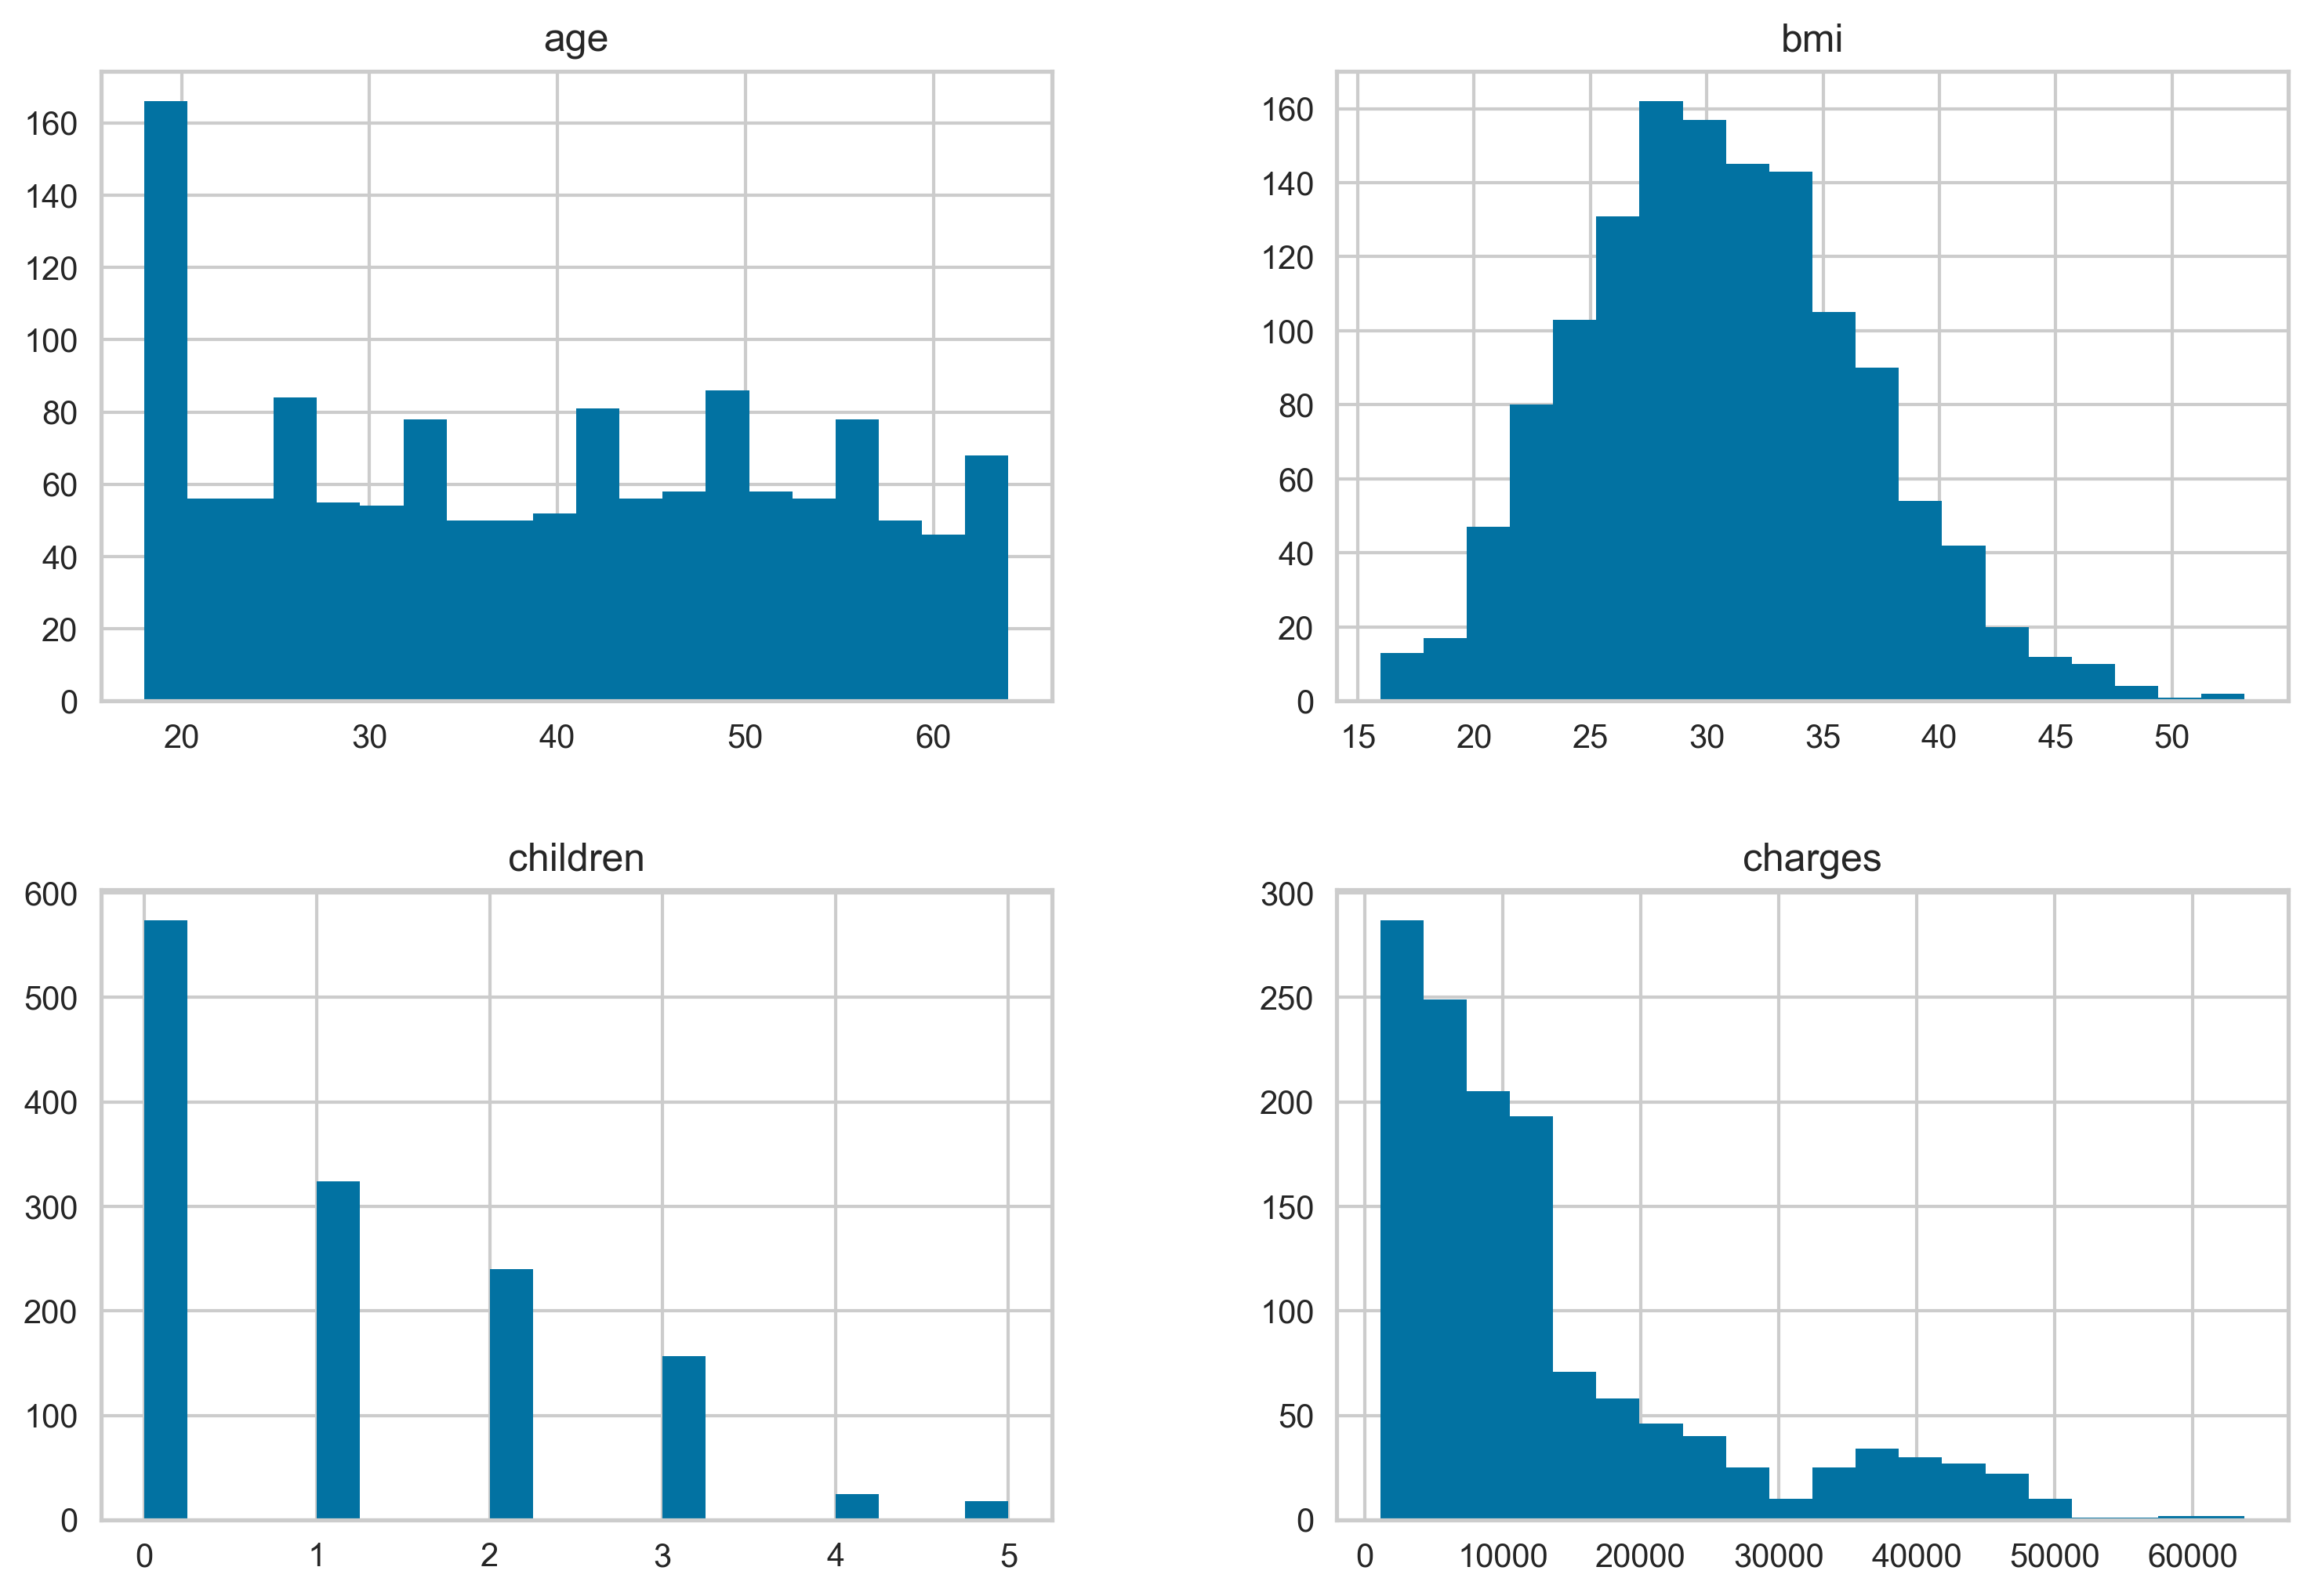

In [4]:
numeric = ['age', 'bmi', 'children', 'charges']
data[numeric].hist(bins=20, figsize = (12,8))
plt.show()

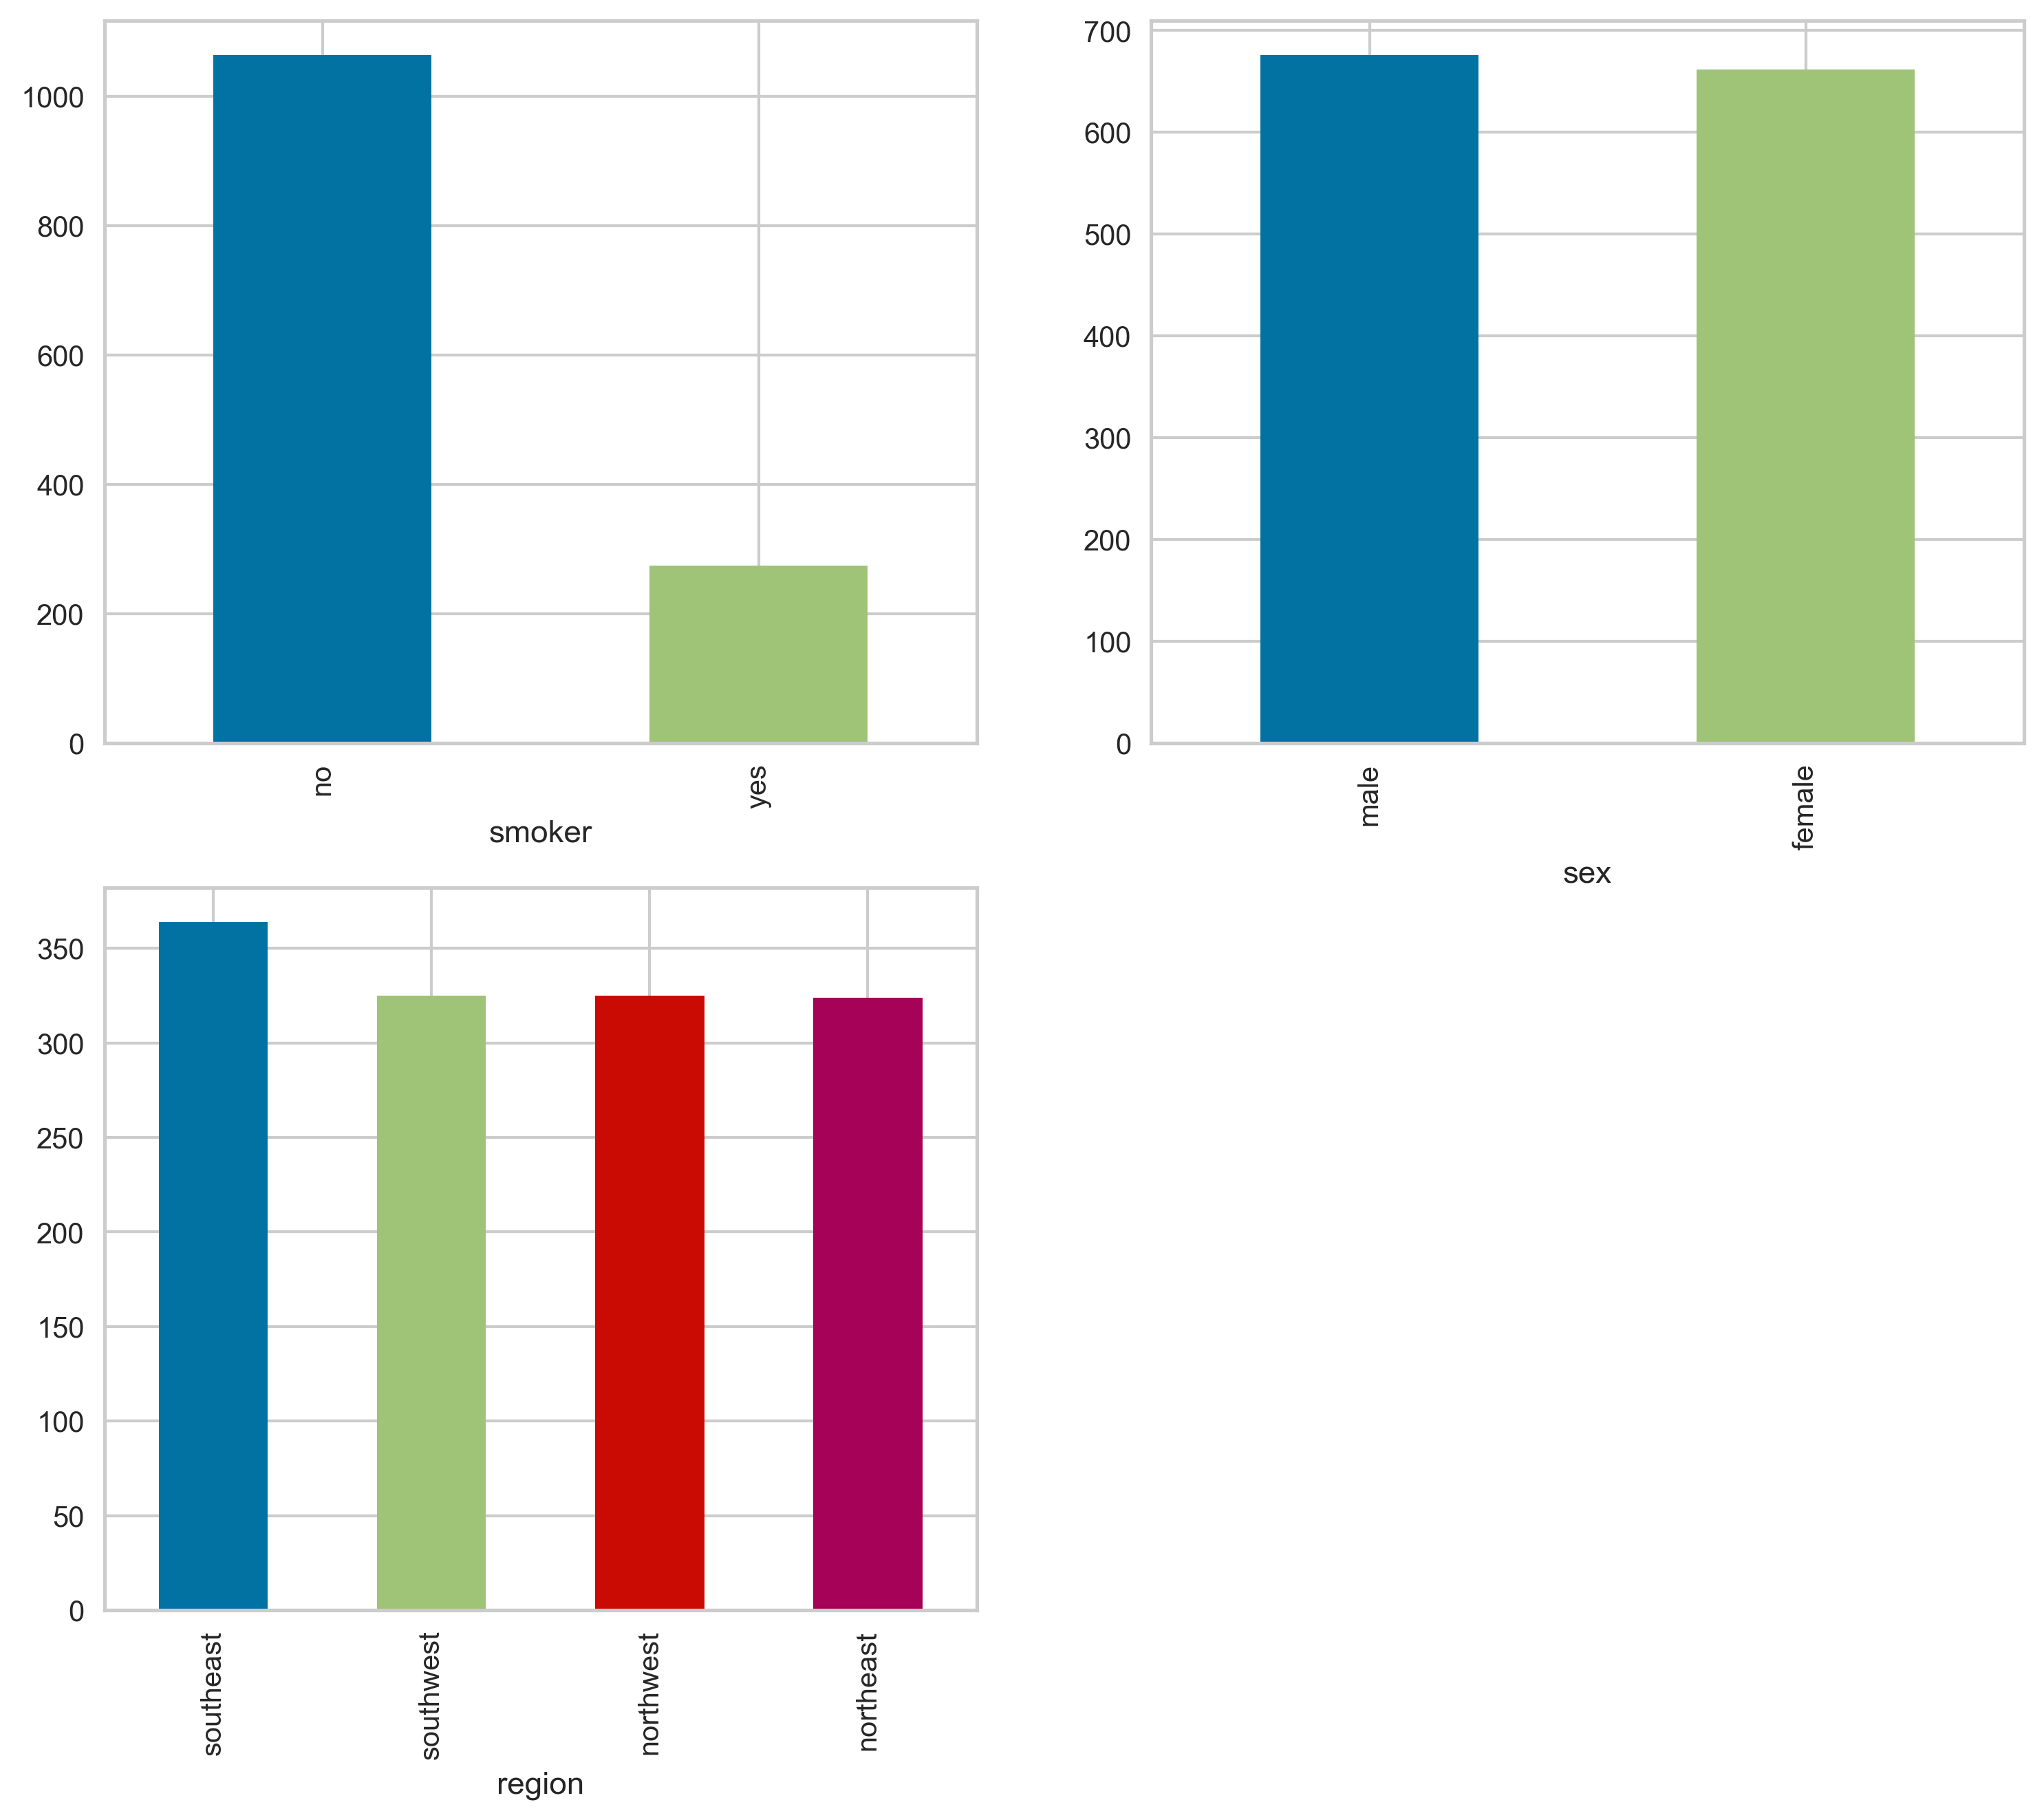

In [5]:
categorical = ['smoker', 'sex', 'region']
color = ['C0', 'C1', 'C2', 'C3']
fig, axes = plt.subplots(2, 2, figsize = (12,10))
axes[1,1].set_axis_off()

for ax, col in zip(axes.flatten(), categorical) :
    data[col].value_counts().plot(kind = 'bar', ax = ax, color = color)
    ax.set_xlabel(col)

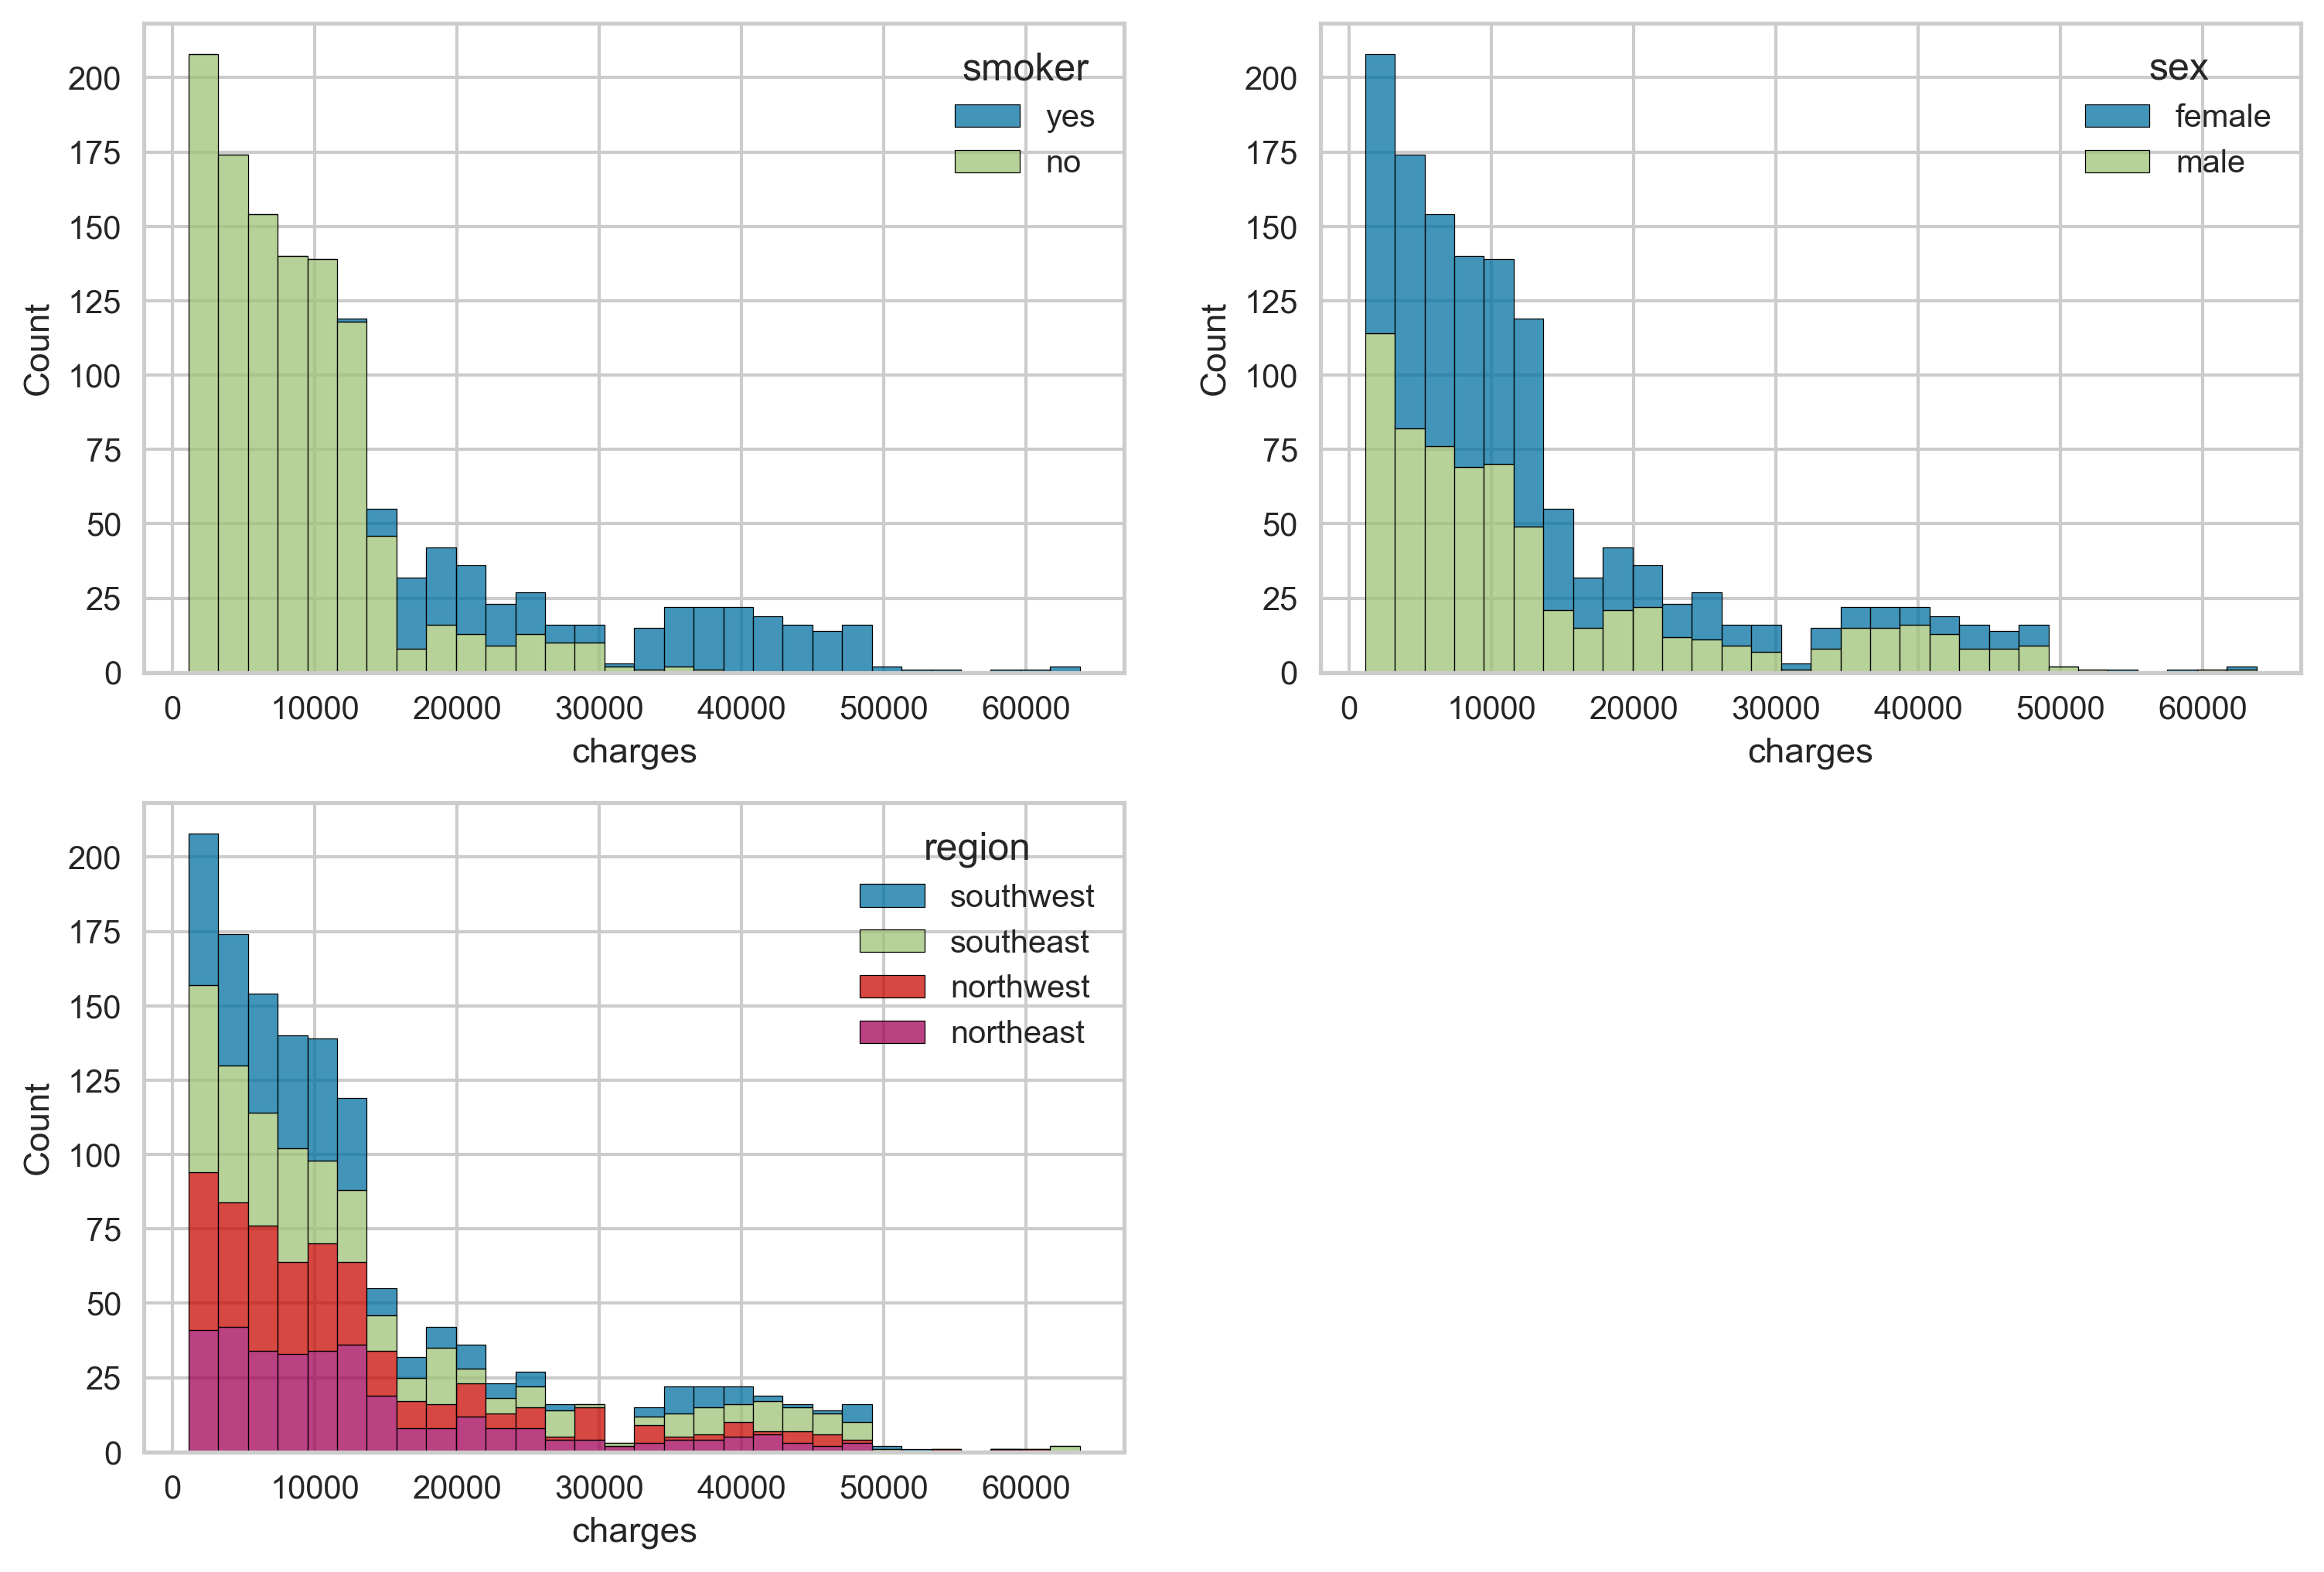

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes[1,1].set_axis_off()
for ax, col in zip(axes.flatten(), categorical):
    sns.histplot(data, x='charges', hue=col, multiple='stack', ax=ax)

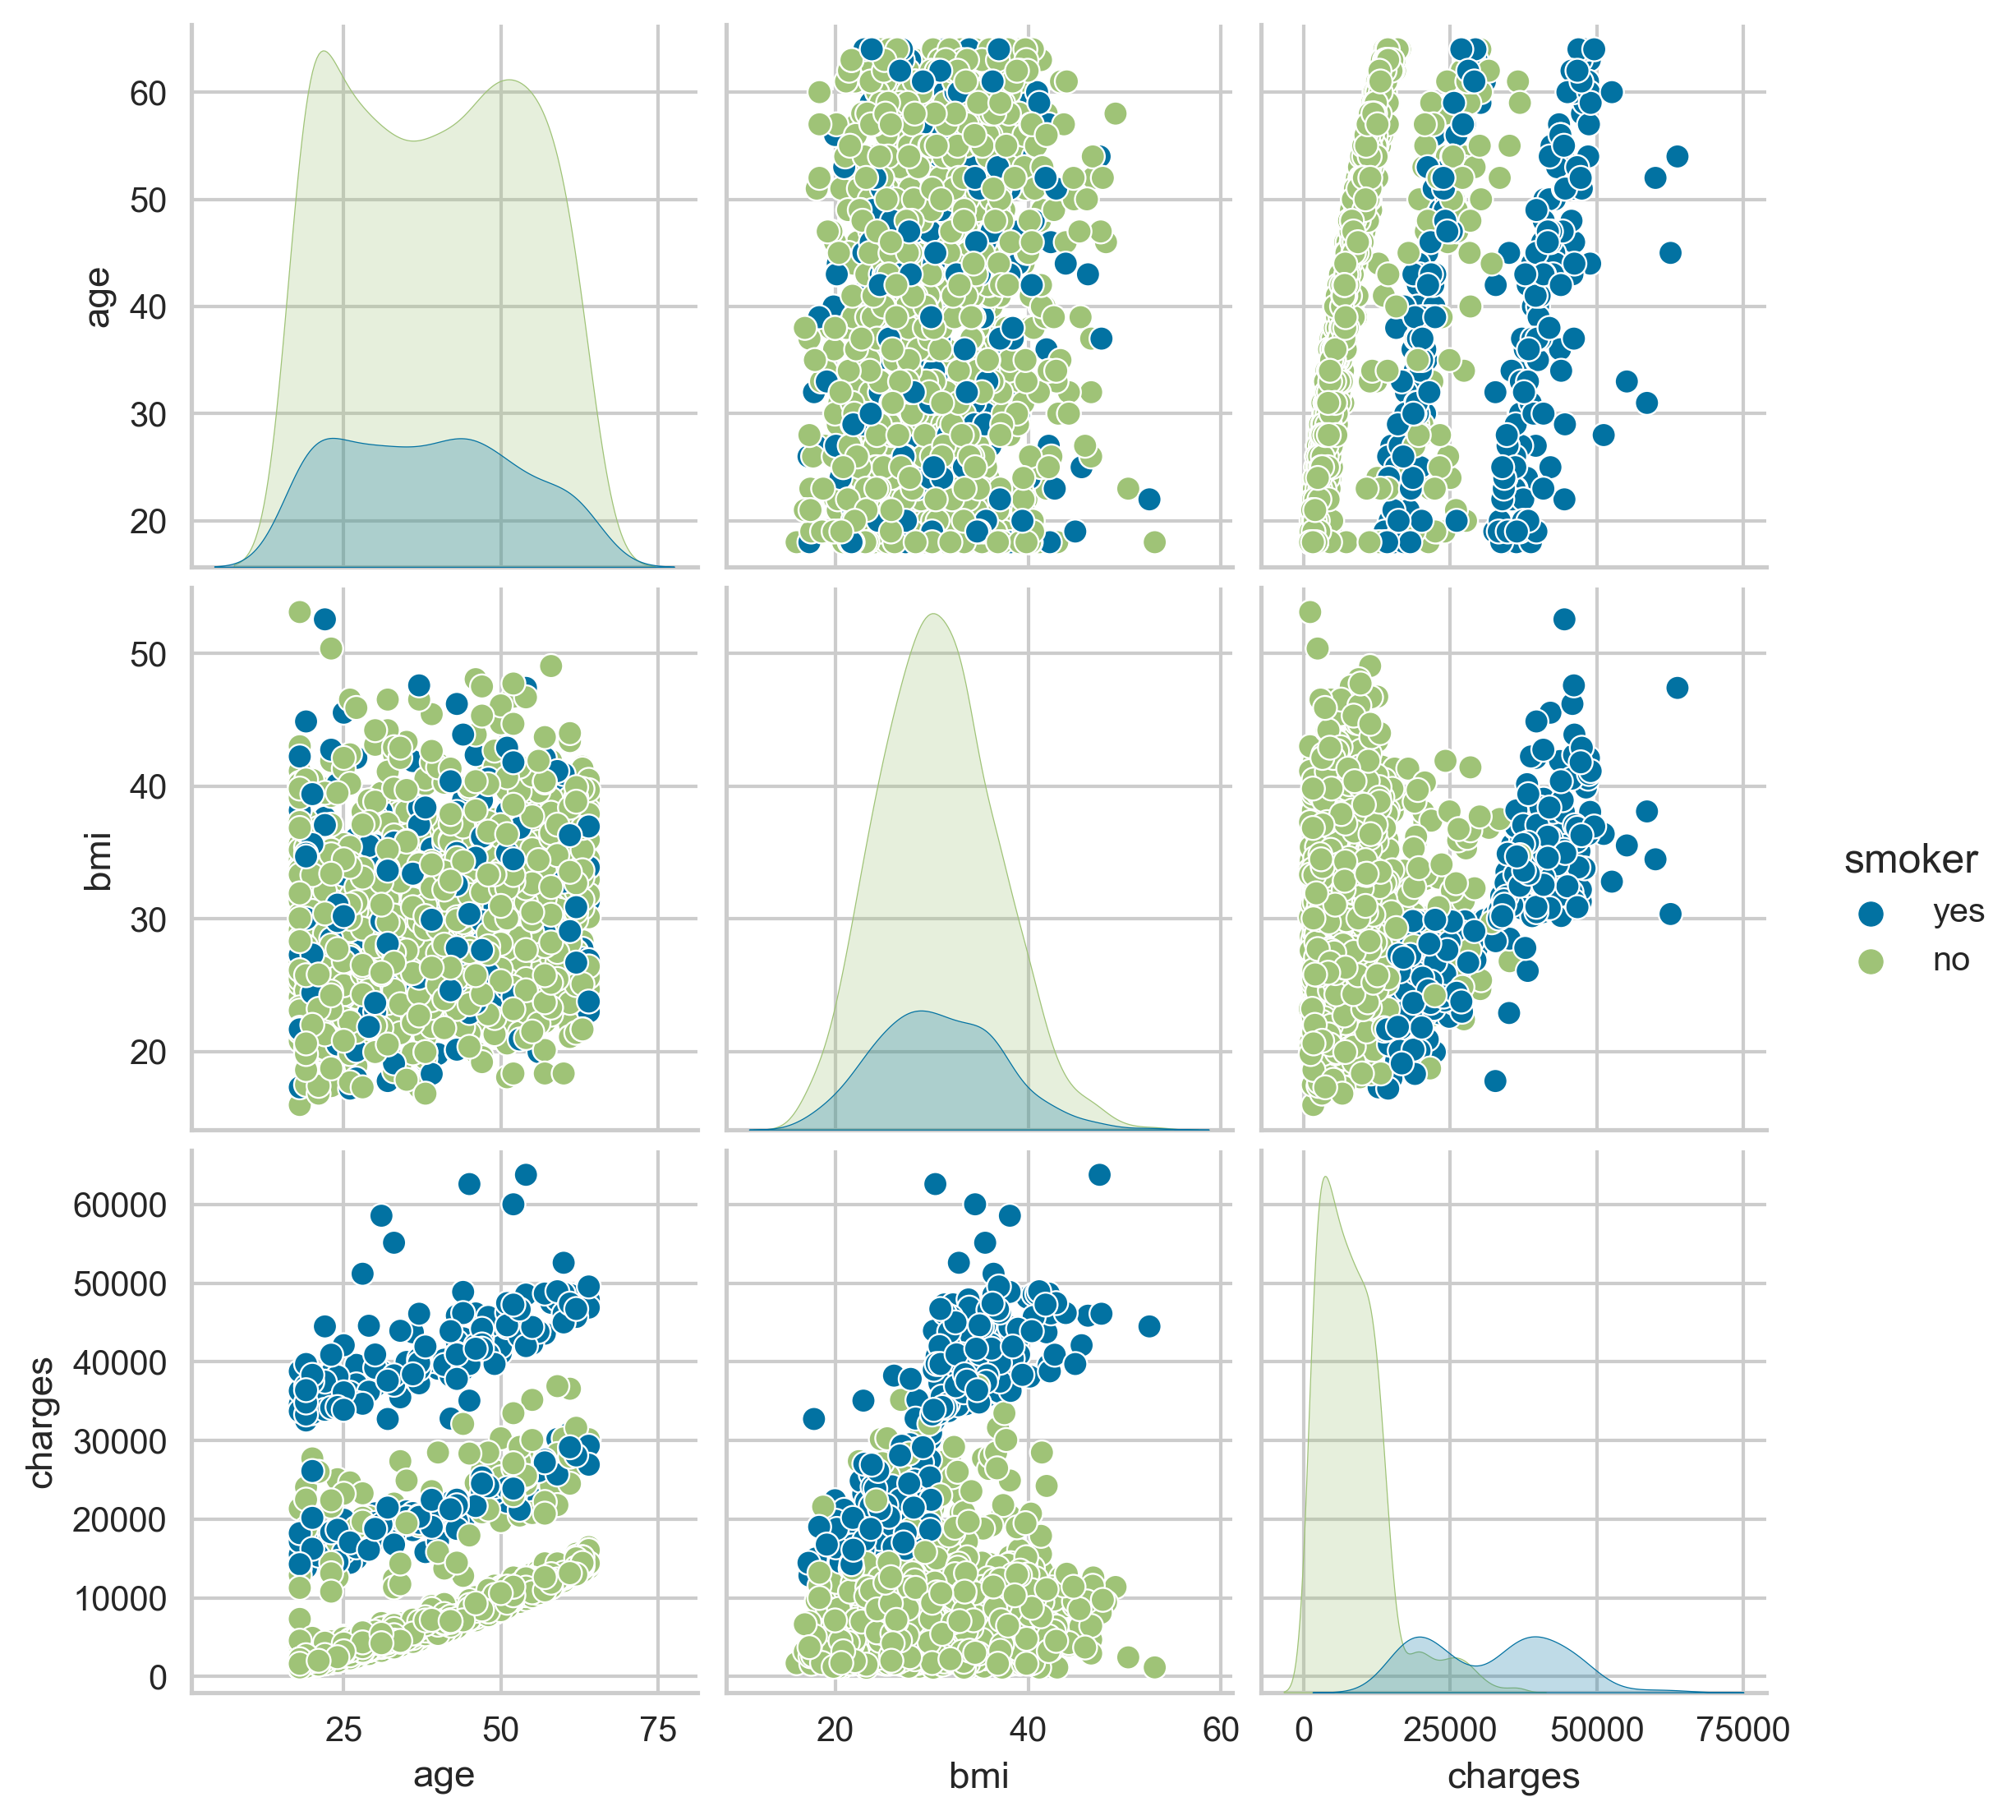

In [7]:
cols = ['age', 'bmi', 'charges', 'smoker']
sns.pairplot(data[cols], hue='smoker')
plt.show()

## Iniciando pycaret enviroment

In [35]:
reg = setup(data, target = 'charges', session_id = 7402)

,Description,Value
0,Session id,7402
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [40]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [41]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [42]:
# init setup on exp
exp.setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [43]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2597.4052,22536146.7988,4717.5037,0.8254,0.4476,0.3233,0.0810
lightgbm,Light Gradient Boosting Machine,2886.3289,24492447.6514,4926.4527,0.8136,0.5661,0.3773,0.1190
rf,Random Forest Regressor,2769.9723,24698857.7316,4954.9437,0.8111,0.4833,0.3548,0.1280
et,Extra Trees Regressor,2723.8543,26812639.4077,5147.5181,0.7947,0.4810,0.3204,0.1090
ada,AdaBoost Regressor,4180.9243,28549836.8665,5313.7468,0.7821,0.6172,0.7012,0.0510
xgboost,Extreme Gradient Boosting,3118.6425,29333591.8000,5394.6113,0.7728,0.5756,0.4214,0.0840
ridge,Ridge Regression,4234.7020,37778042.0246,6129.2291,0.7143,0.5688,0.4299,0.0300
br,Bayesian Ridge,4229.1442,37783978.0593,6129.5254,0.7141,0.5703,0.4288,0.0280
lar,Least Angle Regression,4222.5850,37782512.6970,6129.1888,0.7139,0.5723,0.4276,0.0290
llar,Lasso Least Angle Regression,4222.8529,37780981.2122,6129.0836,0.7139,0.5718,0.4277,0.0320


In [57]:
best = create_model('gbr') #choose catboost to avoid plot errors with some models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3111.8339,29946209.6674,5472.3130,0.6734,0.6291,0.6249
1,2887.4112,23589023.2140,4856.8532,0.8582,0.4970,0.3194
2,2552.0766,21565102.4497,4643.8241,0.8499,0.3677,0.2310
3,2909.8042,24400129.2828,4939.6487,0.7369,0.5477,0.3830
4,2003.1343,15068233.0355,3881.7822,0.9146,0.3602,0.2666
5,2692.4791,28265769.5628,5316.5562,0.8414,0.3899,0.2503
6,2884.2917,26554348.2431,5153.0911,0.8237,0.4734,0.3442
7,2044.3905,14303685.6963,3782.0214,0.9154,0.3017,0.2559
8,2404.6886,20761346.2613,4556.4620,0.7863,0.4958,0.2884


## Analyze models

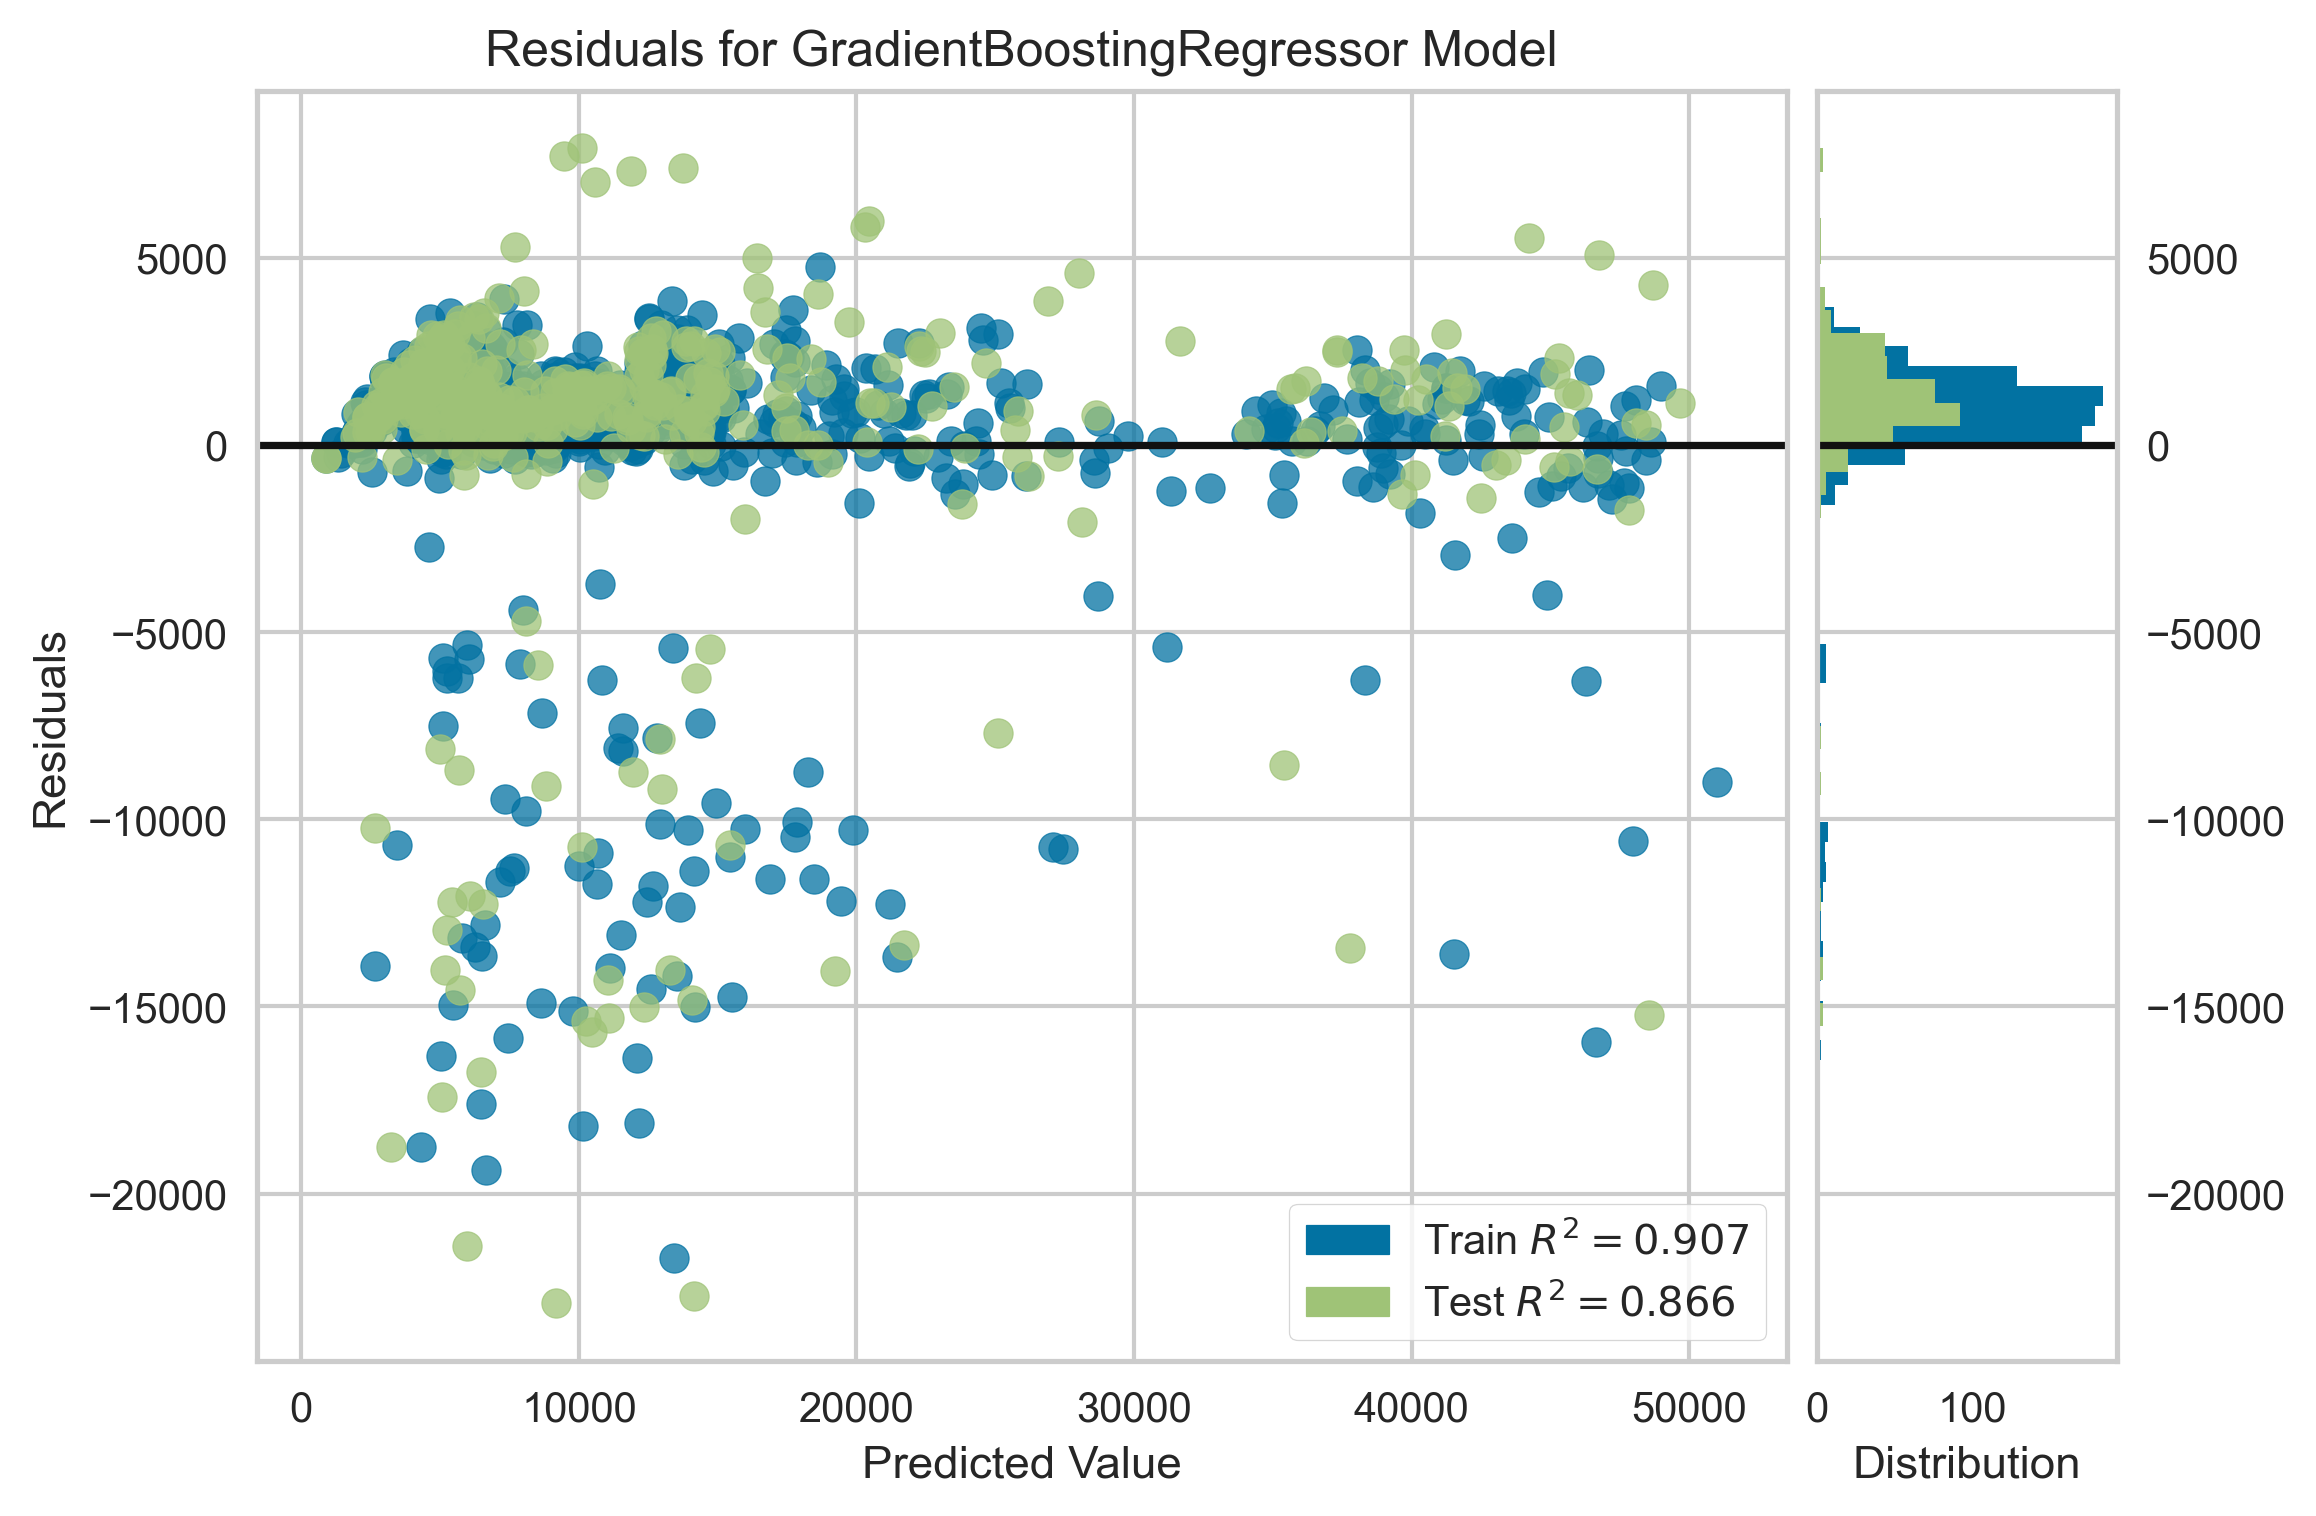

In [58]:
# plot residuals
plot_model(best, plot = 'residuals')

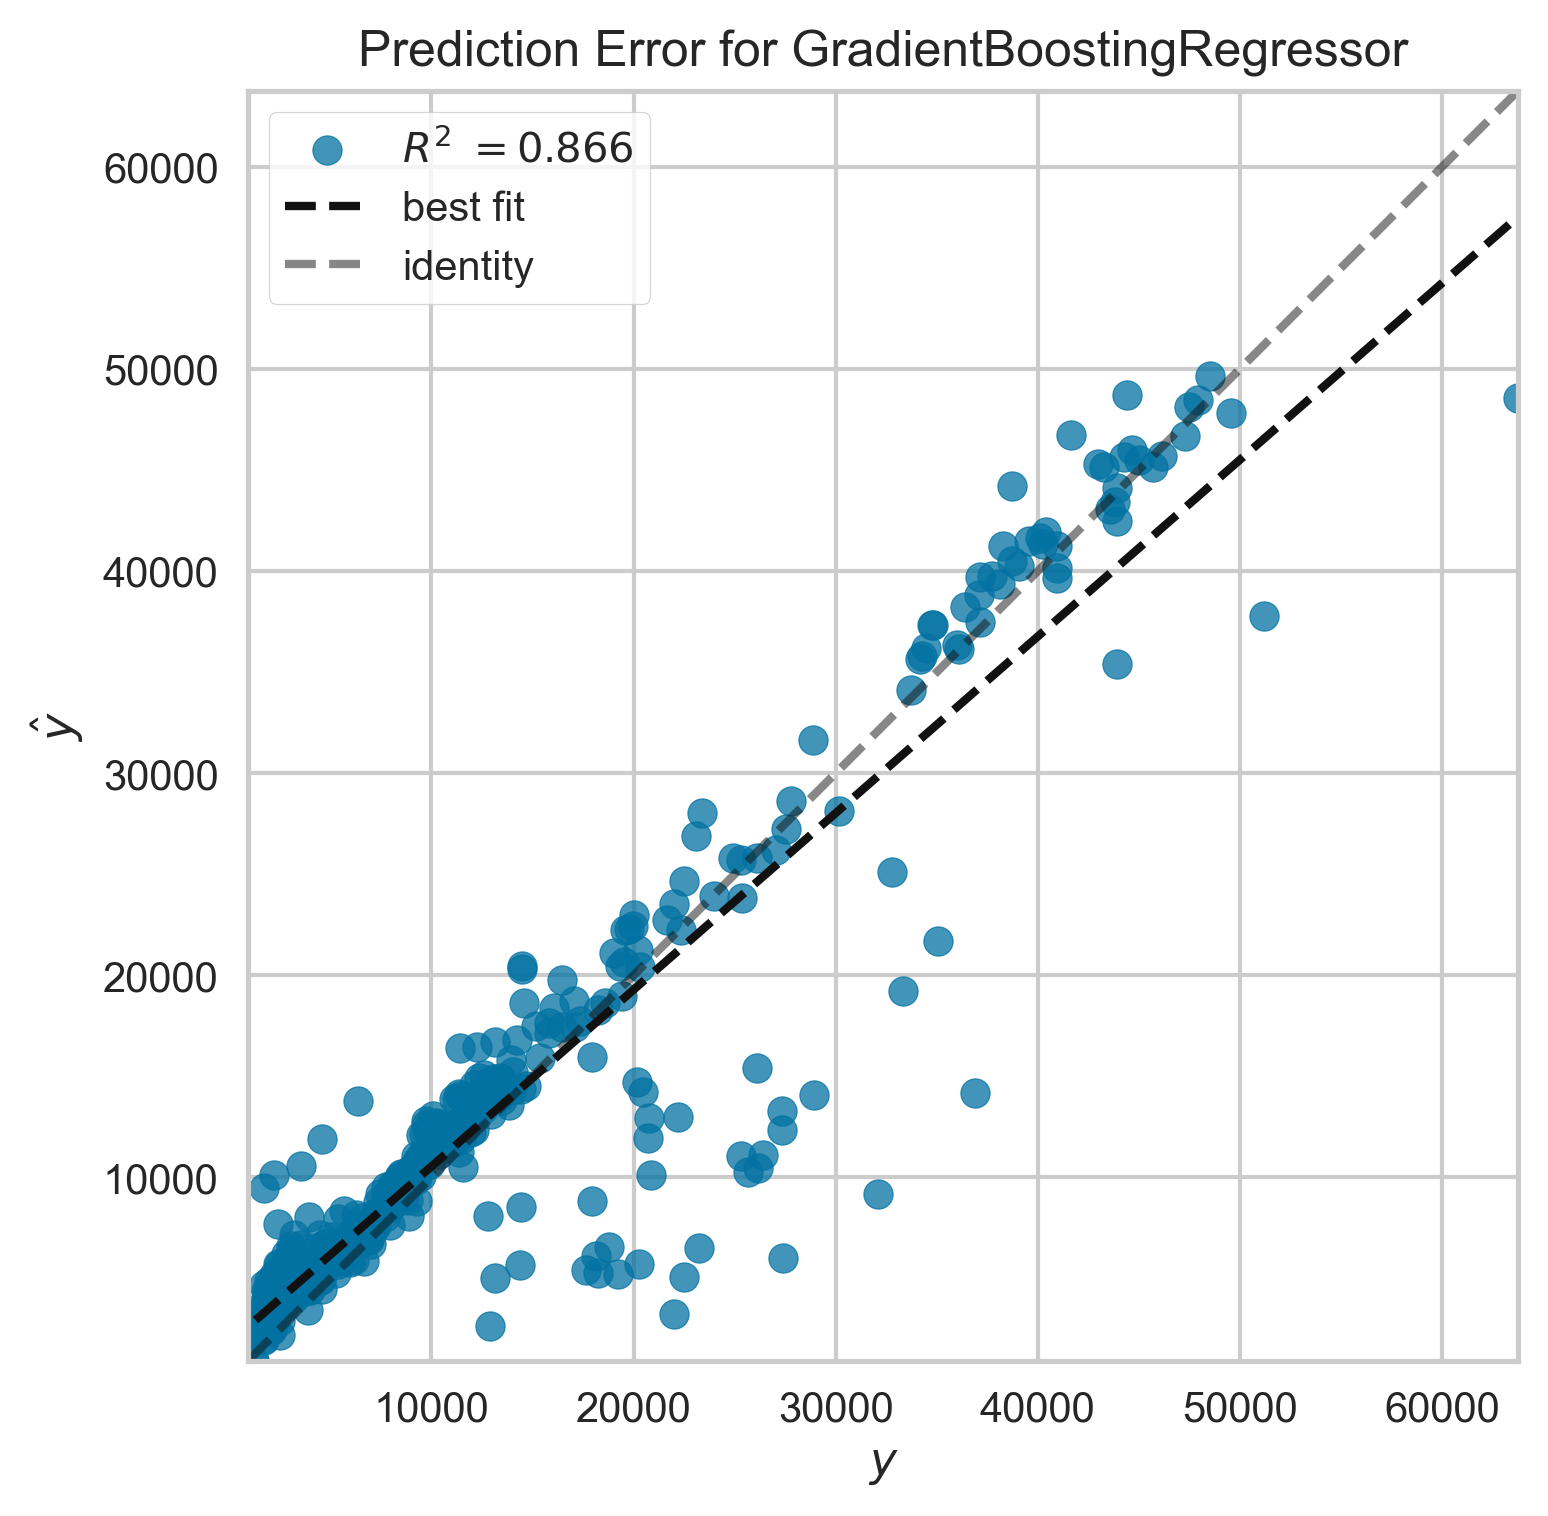

In [59]:
# plot error
plot_model(best, plot = 'error')

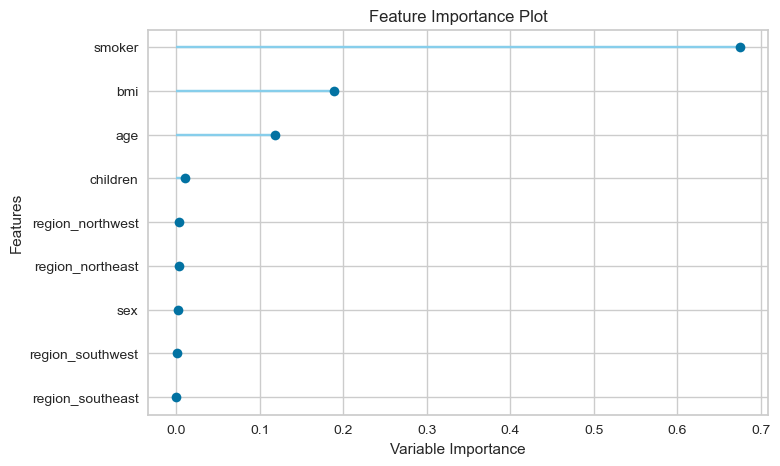

In [60]:
# plot feature importance
plot_model(best, plot = 'feature')

In [61]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Making predictions

In [62]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2589.6808,20605081.1704,4539.2820,0.8658,0.4359,0.3269


In [63]:
# show predictions df
holdout_pred.head()

,age,sex,bmi,children,smoker,region,charges,prediction_label
1004,47,male,19.190001,1,no,northeast,8627.541016,9057.802145
763,27,male,26.030001,0,no,northeast,3070.808594,4280.261115
544,54,male,30.209999,0,no,northwest,10231.500000,12688.786827
256,56,male,33.630001,0,yes,northwest,43921.183594,44090.197998
1171,43,female,26.700001,2,yes,southwest,22478.599609,24683.075189


In [64]:
# copy data and drop charges

new_data = data.copy()
new_data.drop('charges', axis=1, inplace=True)
new_data.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [65]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,age,sex,bmi,children,smoker,region,prediction_label
0,19,female,27.900000,0,yes,southwest,18351.258869
1,18,male,33.770000,1,no,southeast,4665.045595
2,28,male,33.000000,3,no,southeast,6522.811579
3,33,male,22.705000,0,no,northwest,3239.631382
4,32,male,28.879999,0,no,northwest,3459.367377


## Save Model

In [66]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype(

In [67]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\DELL\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWr...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model',
                 GradientBoostingRegressor(random_state=7402))])